# HR Data Analysis and Churn Prediction using Logistic Regression

In this excercise, I will be analyzing the HR Data and try to predict if an employee is likely to leave the organization based on key factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
sal_dumm = pd.get_dummies(df_hr.salary)
merge1 = pd.concat([df_hr,sal_dumm], axis=1)
merge1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [4]:
# Checking overall column level stats
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Checking the column names
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Checking for the Null Values in all the columns
df_hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
# Checking Unique values
df_hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
# Finding correlation among variables
df_hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

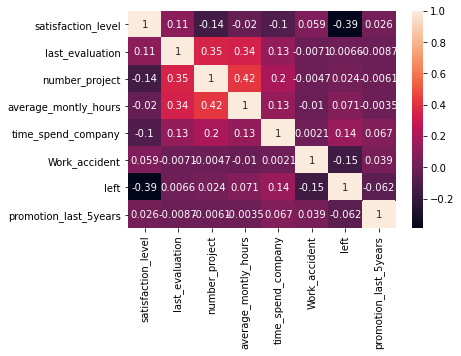

In [9]:
# Correlation Heatmap
sns.heatmap(df_hr.corr(),annot=True)

In [10]:
df_hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


We can observe that 'Satisfaction Level', 'Average Monthly Hours', 'Promotion in last 5 years' contributes significantly to employees leaving the company

Text(0.5, 1.0, 'People with Lower Salary are leaving organiztion the most')

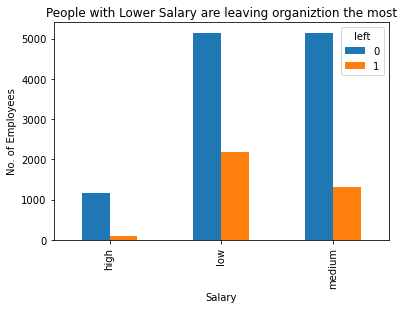

In [26]:
pd.crosstab(df_hr.salary,df_hr.left).plot(kind='bar')
plt.ylabel('No. of Employees')
plt.xlabel('Salary')
plt.title('People with Lower Salary are leaving organiztion the most')

Employees with low income tend to leave the company higher than those with higher income

Text(0, 0.5, 'Number of Employees')

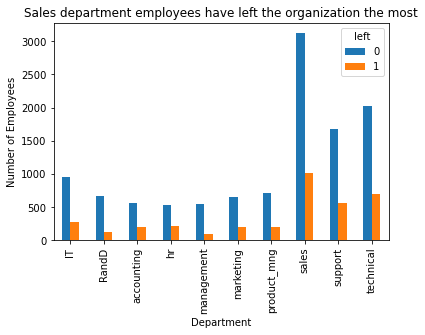

In [27]:
pd.crosstab(df_hr.Department,df_hr.left).plot(kind='bar')
plt.xlabel('Department')
plt.title('Sales department employees have left the organization the most')
plt.ylabel('Number of Employees')

In [13]:
df_sub = df_hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_sub.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [14]:
# Dummy encoding of categorical variable
cat_var = df_sub.columns[df_sub.dtypes == object]
df_dumm = pd.get_dummies(df_hr[cat_var])
df_merge = pd.concat([df_sub,df_dumm],axis=1)
df_merge = df_merge.drop(['salary','salary_medium'],axis=1)
df_merge.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [15]:
# Creating Predictor variables by scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X = min_max.fit_transform(df_merge)
X

array([[0.31868132, 0.28504673, 0.        , 0.        , 1.        ],
       [0.78021978, 0.77570093, 0.        , 0.        , 0.        ],
       [0.02197802, 0.82242991, 0.        , 0.        , 0.        ],
       ...,
       [0.30769231, 0.21962617, 0.        , 0.        , 1.        ],
       [0.02197802, 0.85981308, 0.        , 0.        , 1.        ],
       [0.30769231, 0.28971963, 0.        , 0.        , 1.        ]])

In [16]:
# Creating Response variables
y = df_hr.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [17]:
# Splitting Training and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=123)

In [18]:
# Creating Logistic regression Object
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [20]:
# Predicting values using Train data
pred_train = log_reg.predict(X_train)

In [21]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(pred_train,y_train)

0.776073911801124

In [22]:
# Predicting values using Test data
pred_test = log_reg.predict(X_test)

In [23]:
# Test data Accuracy score
accuracy_score(pred_test,y_test)

0.7757777777777778

Here we can observe that our model is giving us around 77% accuracy for predicting if an employee is likely to leave the company or not.